# Import Library

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import transform
from skimage import io
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load Image File

### Train Image

In [4]:
def loadTrainImages(path='data/Train'):
    classes = [ g for g in os.listdir(path) if os.path.isdir(path + '/' + g)]

    images = []
    labels = []

    for classid in classes:
        image_class_path = os.path.join(path, classid)

        image_files = sorted([os.path.join(image_class_path, file)
                 for file in os.listdir(image_class_path) if file.endswith('.png')])
        
        images.extend(image_files)
        labels.extend([ int(classid) ] * len(image_files))

    return np.array(images), np.array(labels)

In [5]:
train_image, y_train = loadTrainImages()

train_image.shape, y_train.shape

((39209,), (39209,))

### Test Image

In [6]:
def loadTestImages(path='data/Test'):
    image_files = sorted([os.path.join(path, file)
             for file in os.listdir(path) if file.endswith('.png')])

    return np.array(image_files)

In [7]:
test_image = loadTestImages()

In [8]:
y_test = pd.read_csv("Data/Test.csv").ClassId.values

In [9]:
test_image.shape, y_test.shape

((12630,), (12630,))

# Display Image

In [10]:
def displayOriginGray(a, b, title1 = "Original", title2 = "Grayed"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# P1: Grayscale

### Random Image

In [11]:
random_image_file = train_image[2300]

random_image = cv2.imread(random_image_file)

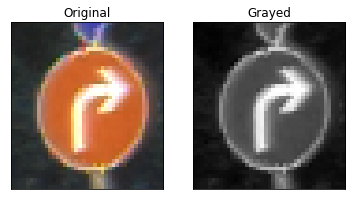

((45, 41, 3), (45, 41))

In [12]:
random_image_gray = cv2.cvtColor(random_image, cv2.COLOR_BGR2GRAY)

displayOriginGray(random_image, random_image_gray)

random_image.shape, random_image_gray.shape

### RGB2Gray

In [18]:
def color2gray(images):
    im_ar=[]
    for im in images:
        image = cv2.imread(im)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        im = transform.resize(gray, (32, 32))
        im_ar.append(im)
    return np.asarray(im_ar)

In [19]:
# X_train_gray = color2gray(train_image)
# np.save('train_gray.npy', X_train_gray)

In [21]:
X_train_gray.shape, y_train.shape

((39209, 32, 32), (39209,))

In [20]:
# X_test_gray = color2gray(test_image)
# np.save('test_gray.npy', X_gray_train)

In [22]:
X_test_gray.shape, y_test.shape

((12630, 32, 32), (12630,))

# Tensorflow

In [23]:
X_train_gray1 = X_train_gray[:, :, :, np.newaxis]

X_test_gray1 = X_test_gray[:, :, :, np.newaxis]

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_gray1, y_train, epochs=10, validation_data=(X_test_gray1, y_test))


Epoch 1/10
1226/1226 [==============================] - 23s 19ms/step - loss: 1.4146 - accuracy: 0.6276 - val_loss: 0.7473 - val_accuracy: 0.8258
Epoch 2/10
1226/1226 [==============================] - 21s 17ms/step - loss: 0.3509 - accuracy: 0.9091 - val_loss: 0.5997 - val_accuracy: 0.8673
Epoch 3/10
1226/1226 [==============================] - 19s 15ms/step - loss: 0.2126 - accuracy: 0.9451 - val_loss: 0.5801 - val_accuracy: 0.8933
Epoch 4/10
1226/1226 [==============================] - 21s 17ms/step - loss: 0.1482 - accuracy: 0.9611 - val_loss: 0.5293 - val_accuracy: 0.9070
Epoch 5/10
1226/1226 [==============================] - 21s 18ms/step - loss: 0.1100 - accuracy: 0.9714 - val_loss: 0.5289 - val_accuracy: 0.9143
Epoch 6/10
1226/1226 [==============================] - 20s 17ms/step - loss: 0.0879 - accuracy: 0.9765 - val_loss: 0.4984 - val_accuracy: 0.9111
Epoch 7/10
1226/1226 [==============================] - 23s 19ms/step - loss: 0.0699 - accuracy: 0.9811 - val_loss: 0.4752 -

395/395 - 2s - loss: 0.5262 - accuracy: 0.9173


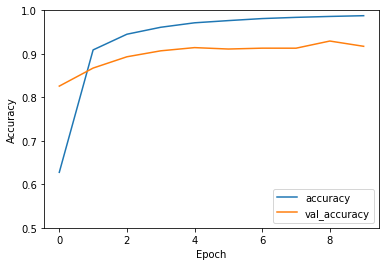

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_gray1, y_test, verbose=2)